# Udacity - Blog - Seattle AirBnB Data Analysis
_____________________________

## CRISP DM
* Business understanding – What does the business need?
* Data understanding – What data do we have / need? Is it clean?
* Data preparation – How do we organize the data for modeling?
* Modeling – What modeling techniques should we apply?
* Evaluation – Which model best meets the business objectives?
* Deployment – How do stakeholders access the results?

### Business Understanding - AirBnb Seattle
1. For the Y2016, what are the counts of available listing count by month? Which month has the most listing?
2. Which neigborhood has the most Airbnb's listing available? Top 10?
3. Is there a huge discrepancies between average listing prices in differing neighborhood?

### Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar as clndr
import seaborn as sns
%matplotlib inline

# Load Seattle AirBnB data
listings = pd.read_csv("Seattle Airbnb Open Data/listings.csv")
calendar = pd.read_csv("Seattle Airbnb Open Data/calendar.csv")
reviews = pd.read_csv("Seattle Airbnb Open Data/reviews.csv")

# Get data size
print("listings: {}, calendar: {}, reviews: {}".format(listings.shape, calendar.shape, reviews.shape))

listings: (3818, 92), calendar: (1393570, 4), reviews: (84849, 6)


In [2]:
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [3]:
# Understanding columns available and associated data
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [4]:
# Understand amount of missing data in listings for each columns (% of missing data = Mean x 100%)
listings.isnull().mean().sort_values(ascending=False)

license                             1.000000
square_feet                         0.974594
monthly_price                       0.602672
security_deposit                    0.511262
weekly_price                        0.473808
notes                               0.420639
neighborhood_overview               0.270299
cleaning_fee                        0.269775
transit                             0.244631
host_about                          0.224987
host_acceptance_rate                0.202462
review_scores_accuracy              0.172342
review_scores_checkin               0.172342
review_scores_value                 0.171818
review_scores_location              0.171556
review_scores_cleanliness           0.171032
review_scores_communication         0.170508
review_scores_rating                0.169460
reviews_per_month                   0.164222
first_review                        0.164222
last_review                         0.164222
space                               0.149031
host_respo

In [5]:
calendar.head(2)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00


In [6]:
# Understanding columns available and associated data
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [7]:
# Understand % of missing data in calendar for each columns (% of missing data = Mean x 100%)
calendar.isnull().mean().sort_values(ascending=False)

price         0.32939
available     0.00000
date          0.00000
listing_id    0.00000
dtype: float64

### Data Preparation

In [8]:
# Define functions for cleaning/prepping
def prepare_listings(df):
    # convert price information to float
    currency_columns = "price weekly_price monthly_price security_deposit cleaning_fee".split()
    if df[currency_columns[0]].dtype != float:
        df[currency_columns] = df[currency_columns].apply(lambda x: x.str.replace('[$,]','')).astype(float)
        
    # only extract desired columns
    df = df[["id", "neighbourhood_cleansed", "price", "cancellation_policy"]]
    
    return df

def prepare_calendar(df):
    # filter to extract only desired data
    df = df[calendar["available"] == "t"] # getting only listings that are available
    
    # date conversion and extract month/day info
    df["date"] = df["date"].apply(lambda x: [int(i) for i in x.split("-")])
    df["date_month"] = df["date"].apply(lambda x: clndr.month_name[x[1]])
    df["date_day"] = df["date"].apply(lambda x: clndr.day_name[clndr.weekday(x[0], x[1], x[2])])
    df["date_year"] = df["date"].apply(lambda x: x[0])
    df = df[df["date_year"] == 2016] # only interested in Y2016 data
                                                                          
    return df

# Clean/Prep
listings = prepare_listings(listings)
calendar = prepare_calendar(calendar)

C:\Users\antho\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\antho\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\antho\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [9]:
listings.head(2)

,id,neighbourhood_cleansed,price,cancellation_policy
0,241032,West Queen Anne,85.0,moderate
1,953595,West Queen Anne,150.0,strict


In [10]:
calendar.head(2)

,listing_id,date,available,price,date_month,date_day,date_year
0,241032,"[2016, 1, 4]",t,$85.00,January,Monday,2016
1,241032,"[2016, 1, 5]",t,$85.00,January,Tuesday,2016


### Data Modeling/Evaluation

**Question 1 - For the Y2016, what are the counts of available listing count by month? Which month has the most listing?**

In [12]:
# Create a pivot table - To identify if there is a relationship between the amount of listing available and month/day
month_order = list(clndr.month_name)[1:]
day_order = list(clndr.day_name)
pivot = calendar.pivot_table(values="listing_id", index=["date_day"], columns=["date_month"], aggfunc=len)
pivot = pivot.reindex(day_order, axis=0)
pivot = pivot.reindex(month_order, axis=1)
pivot = pivot.transpose()
pivot

date_day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
date_month,,,,,,,
January,8396,8611,8543,8367,8262,8315,8745
February,12741,10155,10154,10035,10037,10009,10190
March,10859,13518,13532,13521,10808,10805,10895
April,10130,10144,10120,10083,12900,12573,10087
May,12925,12914,10320,10277,10308,10320,12907
June,10328,10357,12920,12874,10237,10237,10291
July,9571,9596,9604,9598,11940,11936,11977
August,12308,12310,12346,9814,9841,9859,9869
September,10303,10316,10325,12860,12880,10272,10290


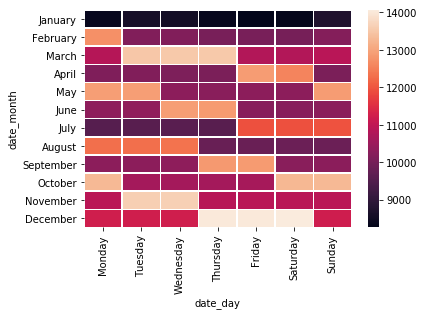

In [13]:
sns.heatmap(pivot, linewidths=.5)

From the heatmap above, it's interesting to note that January has the least amount of listings available regardless of the day. Also, notice that for the month of December, there is a pretty high amount of listing especially for Thursday, Friday and Saturday. Perhaps due to December being a holiday season, people are more willing to list their place on AirBnB while they are away?

**Question 2 - Which neigborhood has the most Airbnb's listing available? Top 10?**

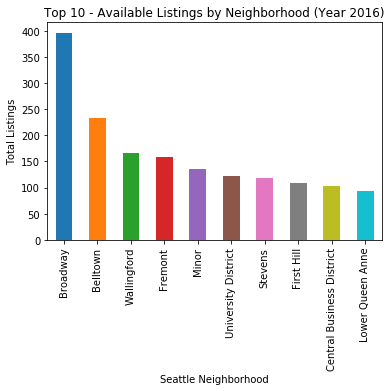

In [31]:
# Group by neigborhood and plot
listings_neighborhood = listings.groupby("neighbourhood_cleansed")["id"].count().sort_values(ascending=False)
top_10_neighborhood = listings_neighborhood[:10]
top_10_neighborhood.plot(kind="bar");
plt.xlabel('Seattle Neighborhood')
plt.ylabel('Total Listings')
plt.title("Top 10 - Available Listings by Neighborhood (Year 2016)");

Graph above shows the top 10 neighborhoods in Seattle based on the amount of listings available. Interesting to notice that Broadway has almost double the amount compared to the 2nd highest neighborhood, Belltown. After a quick Google lookup, it's not surprising since Belltown is the most densely populated neighborhood in Seattle!

In [23]:
list(top_10_neighborhood.keys())

['Broadway',
 'Belltown',
 'Wallingford',
 'Fremont',
 'Minor',
 'University District',
 'Stevens',
 'First Hill',
 'Central Business District',
 'Lower Queen Anne']

**Question 3 - Is there a huge discrepancies between average listing prices in differing neighborhood?**

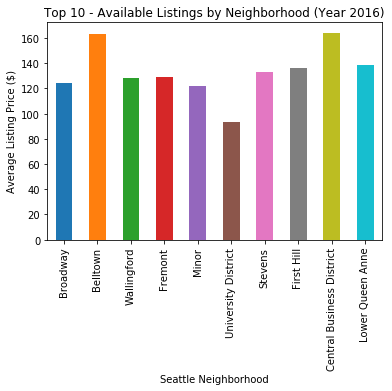

In [33]:
# Get average price of listings in each neighborhood and plot
listings_neighboorhood_avg_price = listings.groupby("neighbourhood_cleansed")["price"].mean()
listings_neighboorhood_avg_price.loc[list(top_10_neighborhood.keys())].plot(kind="bar");
plt.xlabel('Seattle Neighborhood')
plt.ylabel('Average Listing Price ($)')
plt.title("Top 10 - Available Listings by Neighborhood (Year 2016)");

Based on the graph above, it does look like most listings average around $120 regardless of which neighborhood it's in although Belltown, Central Business District and University District seems to be outliers.